<h1 style="color:rgb(0,120,170)">Assignment 2: Gaussian Classifier, Bias-Variance Decomposition, Evaluation Measures </h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names, and more.

Within the notebook, we provide detailed instructions which you should follow in order to maximize your final grade. Please keep in mind:

* Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

* We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than listed in the cell with the "imports" tag.

* Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unittest they won't be available either.

*Good luck! :)*

<h2 style="color:rgb(0,120,170)">Task 1: Gaussian classifier: visualization & parameter estimation (10 points)</h2>

The goal of this task is to explore the given (artificial) data before diving into the classification function. To do this, we will use `matplotlib` to plot the data set and `numpy` to estimate the means & covariance matrices of the classes as well as the probability of encountering a positive/negative example.

* **Task 1.1**: Visualize the data stored in `normal.csv` with two different colors using a scatter plot and store it in the given variable. Always label the axes of all your plots. We also suggest to make a plot legend indicating which color belongs to which label.
* **Task 1.2**: We assume that the data is distributed according to a two-dimensional (bivariate) normal distribution:
    - Write a function that estimates the mean and covariance matrix for the entire dataset, the means and covariance matrices for each class, and the probabilities $p(y=+1)$ and $p(y=-1)$.
    - Return a tuple containing the results (the resulting list should be of length 8). The datatype for `meanX`, `covX`, `meanXpos`, `covXpos`, `meanXneg`, and `covXneg` should be a numpy array, for $p(y=+1)$ and $p(y=-1)$ it should be float.

<h3 style="color:rgb(210,90,80)">1.1. Code & question (4 points):</h3>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline  

In [2]:
# read data, split into X (features) and y (labels)
Z = np.genfromtxt('normal.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

In [3]:
# Visualize the data with a scatter plot
## your code goes here ↓↓↓
def scatter_plot(X, y):
    """creates a scatter-plot for the dataset X with labels y

    Parameters
    ----------
    X : np.ndarray
        data
    y : np.ndarray
        labels

    Returns
    -------
    Figure
        a matplotlib figure object
    """
    fig1 = plt.figure(figsize=(8,5))
    # your code goes here ↓↓↓
    df = pd.DataFrame(dict(
        x1=X[:, 0],
        x2=X[:, 1],
        label=y
    ))

    for name, group in reversed(list(df.groupby('label'))):
        plt.scatter(group.x1, group.x2, label=name)

    plt.title('DataSet1', fontweight='bold')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    return fig1

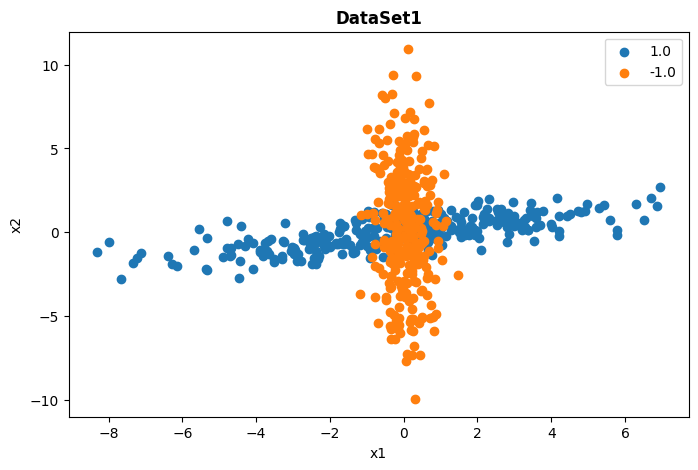

In [4]:
# Nothing to do here, just run the cell.
fig = scatter_plot(X, y)
assert isinstance(fig, Figure)

***Answer the following yes/no questions concerning the distribution of the data:***

a11_) Would a linear regression method be an optimal choice for this task?<br>
b11_) Would a linear classifier achieve a better performance than 25% misclassification?<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [5]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
a11_ = False
b11_ = False

<h3 style="color:rgb(210,90,80)">1.2. Code (6 points):</h3>

In [6]:
def est_mean_cov(X_,y_):
    """
    Function that estimates the means and covariance matrices from the given data as well 
    as the probability to encounter a positive/negative example respectively
    @param X_, np ndarray, data matrix
    @param y_, np ndarray, data vector
    Returns
    covX, covXpos, covXneg: covariance matrices for entire dataset, positive samples, negative samples
    meanX, meanXpos, meanXneg: means for entire dataset, positive samples, negative samples
    p_ypos, p_yneg: probabilites p(y=+1), p(y=-1)
    """
    #your code goes here ↓↓↓
    groups = pd.DataFrame(dict(
        x1=X_[:, 0],
        x2=X_[:, 1],
        label=y_
    )).groupby('label')

    # means
    mean = groups.mean()
    meanX = [
        sum(mean.x1.values)/len(mean.x1),
        sum(mean.x2.values)/len(mean.x2)
    ]
    # mean of positive features
    meanXpos = [mean.x1[1], mean.x2[1]]
    # mean of negative features
    meanXneg = [mean.x1[-1], mean.x2[-1]]

    # covariance
    cov = groups.cov()

    # create another frame such that i can directly call cov()
    covX = pd.DataFrame(dict(
        x1=X_[:, 0],
        x2=X_[:, 1]
    )).cov()
    covXpos = [
        [cov.x1[1].x1, cov.x1[1].x2],
        [cov.x2[1].x1, cov.x2[1].x2]
    ]
    covXneg = [
        [cov.x1[-1].x1, cov.x1[-1].x2],
        [cov.x2[-1].x1, cov.x2[-1].x2]
    ]

    # probabilities
    p_ypos = len(groups.get_group(1))/len(y_)
    p_yneg = 1 - p_ypos
    
    return(meanX, covX, meanXpos, covXpos, meanXneg, covXneg, p_ypos, p_yneg)

In [7]:
# Nothing to do here, just run the cell.
meanX, covX, meanXpos, covXpos, meanXneg, covXneg, p_ypos, p_yneg = est_mean_cov(X,y)

# print corresponding values

print("Entire dataset:\n")
print("Mean = ", meanX, "\n")
print("Covariance:")
print(pd.DataFrame(covX,columns=["x1","x2"],index=["x1","x2"]),"\n\n")

print("Positive class:\n")
print("Mean = ", meanXpos, "\n")
print("Covariance:")
print(pd.DataFrame(covXpos,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("p(y=+1) =", p_ypos, "\n\n")

print("Negative class:\n")
print("Mean =", meanXneg, "\n")
print("Covariance:")
print(pd.DataFrame(covXneg,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("p(y=-1) =", p_yneg)

Entire dataset:

Mean =  [-0.057087335139305445, 0.06468883853150219] 

Covariance:
          x1        x2
x1  4.321541  0.936189
x2  0.936189  6.752614 


Positive class:

Mean =  [-0.14820707076281858, -0.037901128962772285] 

Covariance:
          x1        x2
x1  8.442267  2.017815
x2  2.017815  0.953326 

p(y=+1) = 0.5 


Negative class:

Mean = [0.034032400484207685, 0.16727880602577666] 

Covariance:
          x1         x2
x1  0.198607  -0.161064
x2 -0.161064  12.553366 

p(y=-1) = 0.5


<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classifier: compute classifier & visualization (20 points)</h2>

Now that we got a good idea of the data, we want to implement a classifier and visualize it.

- **Task 2.1**: Compute an optimal classification function $g$ in `calc_func_g()` (see slide 19/92 "Explicit example: Gaussian classifier: Part 2" from lecture Unit2.pdf). To do this, you should:
    - Calculate the values of the corresponding parameters $\mathbf{A}$, $\mathbf{b}$ and $c$ in the provided functions.
    - Store the results in the given parameters **par_A** (np.array), **par_b** (np.array), **par_c** (float), and **func_g** (np.array of shape [500,500]). The $500\times500$ grid (within coordinates $[-11,11]\times[-11,11]$) leads to a nice plot.
    - Print the values of $\mathbf{A}$, $\mathbf{b}$ and $c$ that you have calculated with their respective shapes.
    - Note: You can reuse items from the previous task.

* **Task 2.2**: Visualize the classification function and the original data samples from Task 1.1. in **one** two-dimensional plot. I.e., the plot should show the data samples -- blue for positive and orange for negative -- and also show the classification function (500x500 grid points) in the corresponding (or similar) colors. For the grid points: use alpha=0.05 for opaquness and s=1 for the marker size. The decision boundary will become visible as the line separating the two classification territories. Again: Label the axes and plot a legend.


<h3 style="color:rgb(210,90,80)">2.1 Code (10 points):</h3>

In [8]:

def calc_par_A(meanXpos, covXpos, meanXneg, covXneg, p_ypos, p_yneg):
    """
    This function should contain the calculations for the respective parameter and return the result.
    @param meanXpos, np ndarray, mean of positive examples
    @param covXpos, np ndarray, covariance matrix of positive examples
    @param meanXneg, np ndarray, mean of negative examples
    @param covXneg, np ndarray, covariance matrix of negative examples    
    @param p_ypos, float, probability of encountering a positive example
    @param p_yneg, float, probability of encountering a negative example
    returns np.ndarray
    """
    #your code goes here ↓↓↓
    par_A = np.linalg.inv(covXpos) - np.linalg.inv(covXneg)
    
    return par_A

In [9]:
def calc_par_b(meanXpos,covXpos,meanXneg,covXneg,p_ypos,p_yneg):
    """
    This function should contain the calculations for the respective parameter and return the result.
    @param meanXpos, np ndarray, mean of positive examples
    @param covXpos, np ndarray, covariance matrix of positive examples
    @param meanXneg, np ndarray, mean of negative examples
    @param covXneg, np ndarray, covariance matrix of negative examples
    @param p_ypos, float, probability of encountering a positive example
    @param p_yneg, float, probability of encountering a negative example
    returns np.ndarray
    """
    #your code goes here ↓↓↓
    par_b = np.matmul(np.linalg.inv(covXpos), meanXpos) - np.matmul(np.linalg.inv(covXneg), meanXneg)

    return par_b

In [10]:
def calc_par_c(meanXpos,covXpos,meanXneg,covXneg,p_ypos,p_yneg):
    """
    This function should contain the calculations for the respective parameter and return the result.
    @param meanXpos, np ndarray, mean of positive examples
    @param covXpos, np ndarray, covariance matrix of positive examples
    @param meanXneg, np ndarray, mean of negative examples
    @param covXneg, np ndarray, covariance matrix of negative examples
    @param p_ypos, float, probability of encountering a positive example
    @param p_yneg, float, probability of encountering a negative example
    returns np.float64
    """
    #your code goes here ↓↓↓
    c1_neg = -(1/2)*np.matmul(np.transpose(meanXpos), np.matmul(np.linalg.inv(covXpos), meanXpos))
    c1_pos = +(1/2)*np.matmul(np.transpose(meanXneg), np.matmul(np.linalg.inv(covXneg), meanXneg))

    det_neg = -(1/2)*np.log(np.linalg.det(covXpos))
    det_pos = (1/2)*np.log(np.linalg.det(covXneg))

    par_c = c1_neg + c1_pos + det_neg + det_pos + np.log(p_ypos) - np.log(p_yneg)
    
    return par_c

In [11]:
def calc_func_g(par_A,par_b,par_c,gridpoints):
    """
    Combine the previously calculated parameters to the optimal classification function g.
    Return in shape [500,500]. The 500x500 grid will plot nicely later.
    Avoid hardcoding, i.e. use int(np.sqrt(gridpoints.shape[0]) instead of the number 500
    @param gridpoints, np.array, the points the function g should be applied to 
    returns np.ndarray of shape (500,500)
    """
    #your code goes here ↓↓↓
    g = np.empty((int(np.sqrt(gridpoints.shape[0])), int(np.sqrt(gridpoints.shape[0]))))
    for x1 in range(g.shape[0]):
        for x2 in range(g.shape[1]):
            # grid points has shape (250000,2)
            # x1*500 to skip first x1 rows
            x_vec = gridpoints[x1*500+x2]
            g[x1][x2] = (-(1 / 2) * np.matmul(np.transpose(x_vec), np.matmul(par_A, x_vec)) + np.matmul(
                np.transpose(par_b), x_vec) + par_c)

    # only return either 1 or -1
    return np.sign(g)

In [12]:
# Nothing to do here, just run the cell.

X1, X2 = np.mgrid[-11:11:500j, -11:11:500j]
gridpoints = np.c_[X1.ravel(), X2.ravel()]
    
par_A = calc_par_A(meanXpos,covXpos,meanXneg,covXneg,p_ypos,p_yneg)
par_b = calc_par_b(meanXpos,covXpos,meanXneg,covXneg,p_ypos,p_yneg)
par_c = calc_par_c(meanXpos,covXpos,meanXneg,covXneg,p_ypos,p_yneg)
func_g = calc_func_g(par_A, par_b,par_c,gridpoints)
print("gridponts.shape =",gridpoints.shape,"\n")
print("func_g.shape =",func_g.shape,"\n")
print("A = ",par_A)
print("A.shape = ",par_A.shape,"\n")
print("b = ",par_b)
print("b.shape = ",par_b.shape,"\n")
print("c = ",par_c)
print("c.shape = ",par_c.shape)

gridponts.shape = (250000, 2) 

func_g.shape = (500, 500) 

A =  [[-4.84827549 -0.57269559]
 [-0.57269559  2.04245844]]
A.shape =  (2, 2) 

b =  [-0.2003753  -0.02094713]
b.shape =  (2,) 

c =  -0.23553240713102952
c.shape =  ()


<h3 style="color:rgb(210,90,80)">2.2 Code & question (10 points):</h3>

In [13]:
# Visualize the data and the classifier with a scatter plot
def scatter_plot2(X,X1,X2,y,g):
    """Creates a scatter-plot for the dataset X with labels y and the classification function g
    Parameters
    ----------
    X : np.ndarray
        data
    X1: np.ndarray
        grid x values
    X2: np.ndarray
        grid y values
    y : np.ndarray
        labels
    g : np.ndarray
        the matrix from your Gaussian classifier
    Returns
    -------
    Figure
        a matplotlib figure object
    """
    fig2 = plt.figure(figsize=(8,5))
    # your code goes here ↓↓↓
    df = pd.DataFrame(dict(
        x1=X[:, 0],
        x2=X[:, 1],
        label=y
    ))

    for name, group in reversed(list(df.groupby('label'))):
        plt.scatter(group.x1, group.x2, label=name, s=5)

    plt.title('DateSet1 over classifier', fontweight='bold')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    plt.scatter(X1[1 == g[:]], X2[1 == g[:]], s=1, alpha=0.05, zorder=-1, c='blue')
    plt.scatter(X1[-1 == g[:]], X2[-1 == g[:]], s=1, alpha=0.05, zorder=-1, c='orange')
    plt.show()
    
    return fig2

C:\Users\haslh\OneDrive\Documents\JKU\9.Semester\MachineLearningSupervised\ml_supervised.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


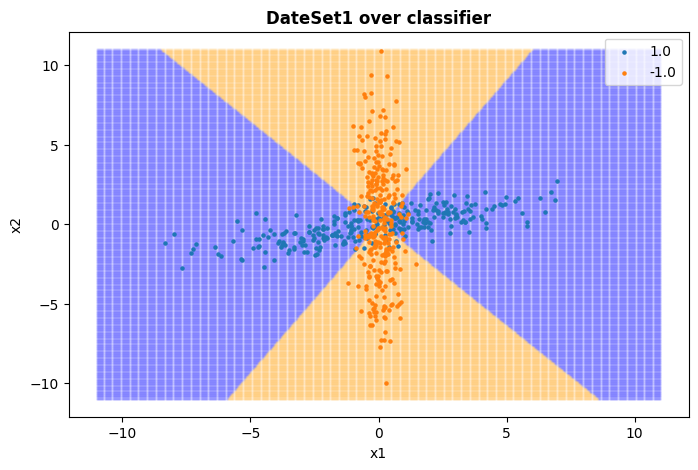

In [14]:
# Nothing to do here, just run the cell.
g = calc_func_g(par_A,par_b,par_c,gridpoints)
fig = scatter_plot2(X, X1, X2, y, g)
assert isinstance(fig, Figure)

***Answer the following questions about the plot you just created:***

a22_) Did the classifier perform well on the task i.e. do the decision boundaries seem to match the classes as plotted in Task 1.1?<br>
b22_) Are datapoints that lie in the middle (i.e. overlapping) region of the two classes less prone to being misclassified compared to data far away from the center?<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [15]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
a22_ = True
b22_ = False

<h2 style="color:rgb(0,120,170)">Task 3: Details for bias-variance decomposition for quadratic loss (15 points)</h2>

An explicit formula of the bias variance decomposition for the quadratic loss was mentioned in the lecture. In this task, you will prove this decomposition yourselves. To this end, let us introduce some notation:

$Z_l = (X,\mathbf{y})$ denotes a data matrix of $l$ elements, with $X$ the ($d\times l$)-dimensional feature matrix and $\mathbf{y}$ the $l$-dimensional (column) label vector. $g(\mathbf{x}_0;\mathbf{w}(Z_l)))$ denotes the model, parametrized by the vector $\mathbf{w}(Z_l)$ trained on $Z_l$, and the variable $y$ is the label corresponding to a (new) feature vector $\mathbf{x}_0$. 

Our object of interest is the expected prediction error (EPE) for
$\mathbf{x}_0$ in case of the quadratic loss, i.e.:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big(L_{\mathbf{q}}(y,g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$

We assume that $y\!\mid\!\mathbf{x}_0$ and the selection of training samples $Z_l$ are
independent which results in the following reformulation of the total expected prediction error:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big) \qquad \text{(1)}$$

Show that we can obtain the following bias-variance decomposition:

\begin{align}
\mathrm{EPE}(\mathbf{x}_0)=&\,\operatorname{Var}(y\!\mid\!\mathbf{x}_0) \\
&+\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2 & \text{(2)}\\
&+\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big) 
\end{align}

For your calculation please use the given notation. Follow the steps indicated below.

<h3 style="color:rgb(210,90,80)">3.1 Calculation (5 points): Expand the Expected Prediction Error.</h3>

Expand $\mathrm{EPE}(\mathbf{x}_0)$, i.e. eq. (1) above, and write it as three separate terms.

Assume: $g = g(x_0;w(Z_l))$
$$E_{y|x_0}\Big[E_{Z_l}\big[(y-g)^2\big]\Big] = E_{y|x_0}\Big[E_{Z_l}\big[y^2-2yg+g^2\big]\Big]$$
$$= E_{y|x_0}\Big[E_{Z_l}\big[y^2\big]\Big] - E_{y|x_0}\Big[E_{Z_l}\big[2yg\big]\Big] + E_{y|x_0}\Big[E_{Z_l}\big[g^2\big]\Big]$$
$$= E_{Z_l}\big[y^2\big] - E_{Z_l}\big[2yg\big] + E_{Z_l}\big[g^2\big]$$
$$= E_{y|x_0}[y^2]-2E_{y|x_0}[y]E_{Z_l}[g]+E_{Z_l}[g^2]$$

<h3 style="color:rgb(210,90,80)">3.2 Calculation (2 points): Rewrite $\operatorname{Var}(y\!\mid\!\mathbf{x}_0)$ using expected values. </h3>

Write the label variance (unavoidable error), i.e. term 1 in (2), in terms of expectation values.

(see Unit2, p.48)
$$Var(y|x_0)=\sigma^2=E_{y|x_0}[(y-E_{y|x_0}[y])^2]$$
$$=E_{y|x_0}[y^2-2yE_{y|x_0}[y]+E_{y|x_0}[y]^2]$$
$$=E_{y|x_0}[y^2]-2E_{y|x_0}[y]E_{y|x_0}[y]+E_{y|x_0}[y]^2$$
$$=E_{y|x_0}[y^2]-E_{y|x_0}[y]^2$$

<h3 style="color:rgb(210,90,80)">3.3. Calculation (3 points): Expand the squared bias.</h3>

Expand the squared bias, i.e. term 2 in (2), and write it in three separate terms.

$$\big(E_{y|x_0}[y]-E_{Z_l}[g]\big)^2 = E_{y|x_0}[y]^2-2E_{y|x_0}[y]E_{Z_l}[g]+E_{Z_l}[g]^2$$

<h3 style="color:rgb(210,90,80)">3.4 Calculation (5 points): Expand the variance of the model.</h3>

Expand model variance, i.e. term 3 in (2), into three terms, and then simplify it to only two terms.

Eventually, show that adding up your results from 3.2., 3.3., and 3.4. leads to your results from 3.1. That concludes the proof.

a)
$${E}_{Z_l}\Big(\big(g-E_{Z_l}(g)\big)^2\Big) = {E}_{Z_l}\big(g^2-2{E}_{Z_l}[g]g+{E}_{Z_l}[g]^2\big)$$
$$= {E}_{Z_l}[g^2] - {E}_{Z_l}\big[2{E}_{Z_l}[g]g\big] + {E}_{Z_l}\big[{E}_{Z_l}[g]^2\big]$$
$$= {E}_{Z_l}[g^2] - 2{E}_{Z_l}[g]{E}_{Z_l}[g] + {E}_{Z_l}[g]^2$$
$$= {E}_{Z_l}[g^2] - 2{E}_{Z_l}[g]^2 + {E}_{Z_l}[g]^2$$
$$= {E}_{Z_l}[g^2] - {E}_{Z_l}[g]^2$$


b)\
(see Unit2, p.48)\
$ E_{y|x_0}[y] = f(x_0) $

(see 3.1)\
$Var(y|x_0)=\sigma^2=E_{y|x_0}[y^2]-E_{y|x_0}[y]^2 => E_{y|x_0}[y^2] = \sigma^2 + E_{y|x_0}[y]^2$


$$E_{y|x_0}[y^2]-2E_{y|x_0}[y]E_{Z_l}[g]+E_{Z_l}[g^2] = \sigma^2 + E_{y|x_0}[y]^2-2E_{y|x_0}[y]E_{Z_l}[g]+E_{Z_l}[g]^2 + {E}_{Z_l}[g^2] - {E}_{Z_l}[g]^2 $$

$$E_{y|x_0}[y^2] = \sigma^2 + E_{y|x_0}[y]^2 $$
$$\sigma^2 + E_{y|x_0}[y]^2 = \sigma^2 + E_{y|x_0}[y]^2 $$
$$ 0=0 $$

<h2 style="color:rgb(0,120,170)">Task 4: Bias-variance decomposition for regression (40 points)</h2>

<h3 style="color:rgb(210,90,80)">4.1 Question (10 points):</h3>

Consider the following one-dimensional regression task: inputs $x$ are
sampled from the uniform distribution in $[−1, 3] \subset \mathbb{R}$ and targets $y$ are given as

\begin{align*}
f(x) &= 0.5\,x^4 + 2\,x^3 - 8\,x^2 \\
y &= f(x) + \varepsilon,
\end{align*}

where $\varepsilon$ is independent normally distributed noise with mean $\mu=0$ and variance $\sigma^2 = 4$. 

***What are $E(y\!\mid\!x_0)$ and the unavoidable error $\operatorname{Var}(y\!\mid\!x_0)$ for a fixed $x_0$ in this setting?***

a41_)   $E(y\!\mid\!x_0) = 0.5\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \,\text{  and  } \operatorname{Var}(y\!\mid\!x_0) = x_0^2$. <br>
b41_)   $E(y\!\mid\!x_0) = 0.5\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \,\text{  and  }  \operatorname{Var}(y\!\mid\!x_0) = \sigma^2$. <br>
c41_)   $E(y\!\mid\!x_0) = 0.5\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \,\text{  and  }  \operatorname{Var}(y\!\mid\!x_0) = 2\sigma^2$. <br>
d41_)   $E(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \,\text{  and  }\operatorname{Var}(y\!\mid\!x_0) = 2\sigma^2$. <br>
e41_)   $E(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \,\text{  and  }\operatorname{Var}(y\!\mid\!x_0) = \sigma^2$. <br>
f41_)   $E(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \,\text{  and  } \operatorname{Var}(y\!\mid\!x_0) = 0.5\,x_0^4 + 2\,x_0^3 - 8\,x_0^2+\sigma^2$.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative 10/3 points and no answer (i.e. answer “None”) gives 0 points for a question. The correct answer will give 10 points. You cannot fall below 0 points in total.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [16]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
# see Unit2.pdf, p.48
a41_=False
b41_=False
c41_=False
d41_=False
e41_=True
f41_=False

We intend to perform polynomial regression to illustrate the bias-variance decomposition for the regression task described before. To this end, perform the following steps:
 * **Task 4.2**:
    * Define the function `func_f`, using the definition in 4.1.
    * Implement the function `create_train_X` which should return $k=300$ training sets with $l=25$ samples in the form of a numpy array. The x-values are sampled from xmin to xmax (later we shall use the specified intervall: $[-1,3]$).
    * Implement the function `create_train_y` which generated the training y-values according to 4.1, i.e. with Gaussian noise. Define the function for general mean mu and standard deviation std (later we shall use the specified values).
    * Below, we provide the code for a function `pol_reg_pred` that trains a polynomial regression model with degree $m$ on a given training set and returns the prediction for a given test set (uniformly sampled $x$ values without labels). Use this to implement the function `bias_var` that estimates for each degree $m=1,...,11$ the squared bias and the variance from the predictions for each of the $k=300$ training sets at $x_0=1.7$ and stores them in the lists sqbias and variance (which are already initiated as empty lists). Each of these two lists should then only contain $11$ elements.
 * **Task 4.3**: 
   * Utilize the function `pol_reg_pred` to produce a <em>single</em> plot that simultaneously visualizes the training data as dots (plot only the <em>first</em> instance of the $k$ training sets, i.e. the 25 points from the first set) and the corresponding models for $m=1,3,11$. Don't forget to label the axes. Note: Make sure to produce the plot in the correct (second) cell.
   * Finally, visualize your results in another <em>single</em> plot where the dependence of (i) the unavoidable error, (ii) the squared bias, (iii) the model variance, and (iv) the total EPE is shown versus $m$. Again, label the axis and plot a legend. Feel free to plot lines to guide the eye, although the horizontal axis is discrete.

<h3 style="color:rgb(210,90,80)">4.2 Code (15 points):</h3>

In [17]:
# Nothing to do here, just run the cell.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# do not change the seed
np.random.seed(12)

def pol_reg_pred(X_train,y_train,X_test,m):
    """
    Function that trains a polynomial regression model with degree on a given training set 
    and returns the prediction for a given test set (uniformly sampled values without labels).
    @param X_train, np.ndarray, training samples
    @param y_train, np.ndarray, training labels
    @param X_test, np.ndarray, test samples
    @param m, int, degree of polynomial
    """
    np.random.seed(12)
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(X_test.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    return y_pred

In [18]:
def func_f(x):
    """
    Implementation of the polynomial from 4.1
    @param x, value you pass to the function
    """
    # your code goes here ↓↓↓
    return 0.5 * pow(x, 4) + 2 * pow(x, 3) - 8 * pow(x, 2)    

In [19]:
def create_train_X(k,l,xmin,xmax):
    """
    Function that creates k training sets with l samples
    @param k, number of training sets to create
    @param l, number of samples per training set
    @param xmin, lower bound of sample interval
    @param xmax, upper bound of sample interval
    """
    # use the numpy.random module and dont change the seed!
    np.random.seed(12)
    
    # your code goes here ↓↓↓
    train_x = np.random.uniform(low=xmin, high=xmax, size=(k, l))
    return train_x

In [20]:
def create_train_y(k,l,X_train,mu,std,func):
    """
    Function that creates labels from training data with func_f and gaussian noise 
    @param k, number of label sets to create
    @param l, number of labels per set
    @param X_train, training set
    @param mu, mean of gaussian
    @param std, std of gaussian
    @param func, callable, polynomial function
    returns np.ndarray 
    """
    # use the numpy.random module and dont change the seed!
    np.random.seed(12)
    
    # your code goes here ↓↓↓
    noise = np.random.normal(mu, std, size=(k, l))
    train_y = np.zeros((k, l))

    for k_i in range(k):
        for l_i in range(l):
            train_y[k_i][l_i] = func(X_train[k_i][l_i]) + noise[k_i][l_i]

    return train_y

In [21]:
def bias_var(X_train,y_train,M,k,func): 
    """
    Function that computes model bias and variance 
    @param X_train, np.ndarray, training data
    @param y_train, np.ndarray, training labels
    @param M, int, upper bound on m (degree of the polynomial)
    @param k, int, number of sample sets
    @param func, callable, polynomial function
    returns sqbias,variance 
    """
    x0 = np.array([1.7])
    sqbias = []
    variance = []
    
    # your code goes here ↓↓↓
    # calculate for all polynomial degrees
    for m_i in range(M):
        y_pred = []
        # predict for all sample sets
        for k_i in range(k):
            y_pred.append(pol_reg_pred(X_train[k_i], y_train[k_i], x0, m_i + 1))
        # (f(x_0) - E[X])^2
        sqbias.append((func(x0[0]) - np.mean(y_pred))** 2)
        # E[(X - E[X])^2]
        variance.append(np.mean((y_pred - np.mean(y_pred))** 2))
        
    return (sqbias,variance) 

In [22]:
## If you get deprecation warnings from numpy in the following cell, uncomment these two lines:
#import warnings
#warnings.filterwarnings('ignore')
## Else: Nothing to do here, just run the cell.
k = 300
l = 25
M = 11
xmin=-1
xmax=3
mu=0
sigmasq=4
std=np.sqrt(sigmasq)

X_train = create_train_X(k,l,xmin,xmax)
y_train = create_train_y(k,l,X_train,mu,std,func_f)
sqbias, variance = bias_var(X_train,y_train,M,k,func_f)

print("Shapes of X and y: \n",X_train.shape,y_train.shape)
print("\nSquared Bias over m: \n", sqbias)
print("\nVariance over m: \n", variance)

Shapes of X and y: 
 (300, 25) (300, 25)

Squared Bias over m: 
 [55.04616915080214, 25.88921586264565, 0.006393227445529584, 1.5184764691872475e-06, 8.310157503395539e-05, 0.003528592003890417, 0.009147879026336595, 0.001742179688892215, 0.01610174877541287, 0.001018519590490482, 0.04575672857333129]

Variance over m: 
 [4.436128574277649, 2.3071558245969754, 0.6861143019387123, 0.7233181673774502, 1.0316325317237645, 1.28427732546951, 1.7965836650371527, 2.7825263104776736, 2.84032616295528, 6.338451480337072, 19.353078841495737]


<h3 style="color:rgb(210,90,80)">4.3 Code (10 points):</h3>

In [23]:
## test data, from -1 to 3 in steps of 0.01
# Nothing to do here, just run the cell.
np.random.seed(12)
x_ = np.arange(xmin, xmax, 0.01)   ## test data, from -1 to 3 in steps of 0.01

In [24]:
# Visualize the datapoints and the classifiers with different m = [1,3,11]
def plot3(X_train, y_train, x, pol_reg_):
    """creates a plot for the training data and the corresponding regression models with different m

    Parameters
    ----------
    X_train : np.ndarray
        training data
    y_train : np.ndarray
        labels
    x       : np.ndarray
        test data
    pol_reg_ : function
        polynomial regression function
    Returns
    -------
    Figure
        a matplotlib figure object
    """
    fig3 = plt.figure(figsize=(8,5))
    # your code goes here ↓↓↓
    plt.title('Polynomial Regression Prediction', fontweight='bold')
    plt.scatter(X_train[0], y_train[0])
    plt.plot(x, pol_reg_pred(X_train[0], y_train[0], x, 1), c='r', label='m=1')
    plt.plot(x, pol_reg_pred(X_train[0], y_train[0], x, 3), c='y', label='m=3')
    plt.plot(x, pol_reg_pred(X_train[0], y_train[0], x, 11), c='m', label='m=11')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
    return fig3

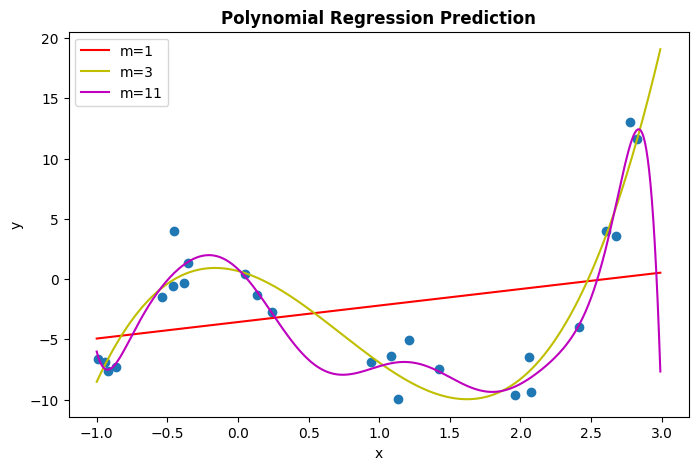

In [25]:
# Nothing to do here, just run the cell.
fig3 = plot3(X_train, y_train,x_, pol_reg_pred)
assert isinstance(fig3, Figure)

In [26]:
# Visualize unavoidable error, squared bias, model variance and total EPE vs. m in [1,11]
def plot4(M, sigmasq, biassq, var):
    """creates a plot for  unavoidable error, bias, variance and EPE vs. m in [1,11]

    Parameters
    ----------
    M    : int
        m is in [1,M]
    sigmasq: float
        unavoidable error
    biassq : np.ndarray
        squared bias
    var  : np.ndarray
        model variance 
    Returns
    -------
    Figure
        a matplotlib figure object
    """
    fig4 = plt.figure(figsize=(8,5))
    # your code goes here ↓↓↓
    plt.title('Error to degree of the polynomial', fontweight='bold')
    # constant sigma squared
    plt.plot(range(M), np.full(M, sigmasq), c='r', label='unavoidable error')
    plt.plot(range(M), biassq, c='b', label='squared bias')
    plt.plot(range(M), var, color='orange', label='variance')
    # sum of all three
    plt.plot(range(M), np.sum([biassq, var, np.full(M, sigmasq)], axis=0), c='g', label='total EPE', ls='--')
    plt.xlabel("m")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
    
    return fig4

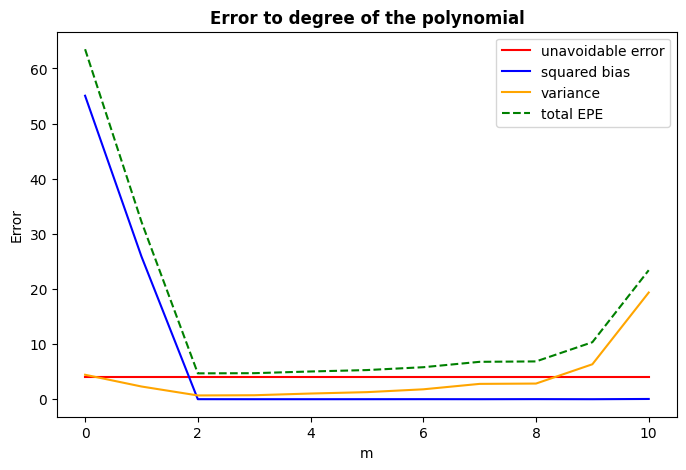

In [27]:
# Nothing to do here, just run the cell.
fig4 = plot4(M, sigmasq, sqbias, variance)
assert isinstance(fig4, Figure)

<h3 style="color:rgb(210,90,80)">4.4 Question (5 points):</h3>

If you did the previous task correctly, the resulting plot should look similar to the following:

![bias-variance.png](bias-variance.png)


***What observations can you make from this plot? Tick the correct boxes (several may be correct):***

a42_) The variance is low for models which are too complex, i.e. $m \leq 2$. <br>
b42_) For appropriate complexity, i.e. $3 \leq m \leq 6$, both model variance and bias are low, which indicates good generalization abilities.<br>
c42_) As the model becomes too complex, i.e. $m \geq 9$, the variance increases again while the bias still decreases. This is an indication for overfitting.<br>
d42_) For models with $m \geq 9$, the variance is high (i.e. significantly larger than $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>
e42_) For models with $m \geq 9$, the bias is still low (i.e. close to $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question.<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [28]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
a42_=False
b42_=True
c42_=True
d42_=False
e42_=True
#

<h2 style="color:rgb(0,120,170)">Task 5: Evaluation metrics for imbalanced data sets (15 points)</h2>

Consider a classifier with discriminant function $\bar g$.
For a given labeled data set, the following results are obtained:
$$\begin{array}{|r|r|}
\hline
y & \bar g(x)\\
\hline \hline
 +1 & 0.93 \\
 +1 & 0.51 \\
 +1 & 0.48 \\
 -1 & 0.13 \\
 +1 & 0.02 \\
 -1 & -0.11 \\
 -1 & -0.25 \\
 -1 & -0.37 \\
 +1 & -0.41 \\
 -1 & -1.68 \\
 +1 & -2.23 \\
 -1 & -3.41 \\
\hline
\end{array}$$

* **Task 5.1**:
  * Compute the confusion matrix using the usual $\theta = 0$ threshold.
  * Complete the function evaluation_measures to calculate the following evaluation measures: TPR, TNR, FPR, FNR, ACC, BACC, PREC, and $F_1$, and store the exact results in the respective variables.

<h3 style="color:rgb(210,90,80)">5.1 Calculation (8 points):</h3>

* <b>Reminder:</b> Confusion Matrix structure:

$$
\begin{array}{|c|c|c|}
\hline
 & g(x)=+1  & g(x)=-1\\
 \hline
 y=+1 & \text{TP}  & \text{FN} \\
 \hline
 y=-1 & \text{FP} & \text{TN} \\
\hline
\end{array}
$$

In [29]:
# confusion matrix 
# your answers (integers!) go here ↓↓↓ 
_TP = 4
_FN = 2
_FP = 1
_TN = 5
#

In [30]:
# evaluation measures
def evaluation_measures(TP,TN,FP,FN):
    """
    This function should return the desired evaluation measures. 
    @param TP, True Positives
    @param FN, False Negatives
    @param FP, False Positives
    @param TN, True Negatives
    returns TPR,TNR,FPR,FNR,ACC,BACC,PREC,F1
    """    
    # your code goes here ↓↓↓
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(TN+FP)
    FNR = FN/(TP+FN)
    ACC = (TP+TN)/(TP+TN+FP+FN)
    BACC = (TPR+TNR)/2
    PREC = TP/(TP+FP)
    F1 = 2*PREC*TPR/(PREC+TPR)
    
    return (TPR,TNR,FPR,FNR,ACC,BACC,PREC,F1)

In [31]:
_TPR,_TNR,_FPR,_FNR,_ACC,_BACC,_PREC,_F1 = evaluation_measures(_TP,_TN,_FP,_FN)

print(" TPR = {:.3f}\n TNR = {:.3f}\n FPR = {:.3f}\n FNR = {:.3f}\n ACC = {:.3f}\nBACC = {:.3f}\nPREC = {:.3f}\n  F1 = {:.3f}".format(_TPR,_TNR,_FPR,_FNR,_ACC,_BACC,_PREC,_F1))

 TPR = 0.667
 TNR = 0.833
 FPR = 0.167
 FNR = 0.333
 ACC = 0.750
BACC = 0.750
PREC = 0.800
  F1 = 0.727


Let's say we have a population of 1000 people and we know that 50 are infected with the corona virus.
* **Task 5.2**: Assume that the population is tested with an assay that has a certain specificity and sensitivity.

  * (1) What is the probability $p_1$ that a person is *not* infected if they are diagnosed as ill by the test? <br>
  * (2) What is the probability $p_2$ that a person is infected if they are diagnosed as healthy by the test?

Write a function that returns both values. Then check your calculation using specificity of $90 \%$ and sensitivity of $95 \%$.

**Note**: Round your result to 4 decimal points, i.e. 0.9871 if it is 98.71%.

<h3 style="color:rgb(210,90,80)">5.2 Calculation (7 points):</h3>

In [32]:
def calc_prob(spec,sens,pop,inf):
    """
    This function should return the desired probabilities p1 and p2. 
    @param spec, float, specificity
    @param sens, float, sensitivity
    @param pop, int, population
    @param inf, int, infected
    returns p1,p2
    """
    population = pop
    infected = inf
    # your code goes here ↓↓↓
    TNR = spec
    TPR = sens
    N = population - infected

    TN = N * TNR
    TP = infected * TPR
    FP = N - TN
    FN = infected - TP
    
    # all falsely positive tested in all positive samples
    p1 = round(FP/(TP+FP), 4)

    # all falsely negative tested in all negative samples
    p2 = round(FN/(TN+FN), 4)
    
    return p1,p2

In [33]:
_result = calc_prob(0.90,0.95,1000,50)
print("The probability that a person who is tested positive is in fact not infected is {}".format(_result[0]))
print("The probability that a person who is tested negative is in fact infected is {}".format(_result[1]))

The probability that a person who is tested positive is in fact not infected is 0.6667
The probability that a person who is tested negative is in fact infected is 0.0029


In [34]:
# executability check
est_mean_cov(X,y)
calc_par_A(np.ones(shape=2),np.eye(2),np.ones(shape=2),np.eye(2),1,1)
calc_par_b(np.ones(shape=2),np.eye(2),np.ones(shape=2),np.eye(2),1,1)
calc_par_c(np.ones(shape=2),np.eye(2),np.ones(shape=2),np.eye(2),1,1)
calc_func_g(np.ones(shape=(2,2)),np.ones(2),1,np.ones(shape=(250000,2)))
create_train_X(1,1,1,2)
create_train_y(1,1,np.ones((300,25)),1,1,func_f)
bias_var(np.ones((300,25)),np.ones((300,25)),M,k,func_f)
evaluation_measures(1,1,1,1)
calc_prob(1,1,2,1)
print("Executable")

Executable
